In [3]:
fact=3
fact*=2

In [4]:
fact

6

In [7]:
import math as m

In [9]:
m.factorial(3)

6

In [10]:
from math import *

In [11]:
factorial(4)

24

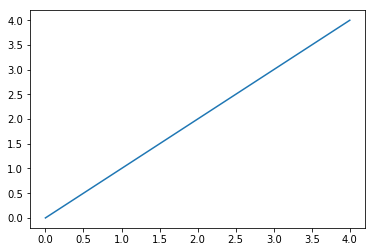

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(5))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv(r'D:\marlabs\Datasets\loan pred\train.csv')

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.shape

(614, 13)

In [7]:
len(df['Loan_ID'].unique())

614

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

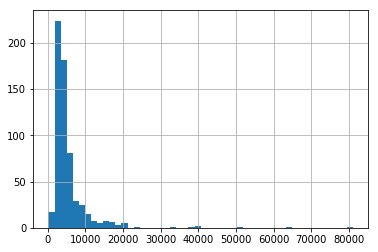

In [11]:
df['ApplicantIncome'].hist(bins=50)

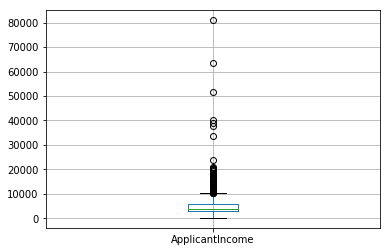

In [12]:
df.boxplot(column='ApplicantIncome')

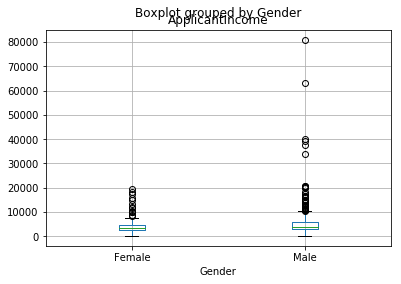

In [13]:
df.boxplot(column='ApplicantIncome',by='Gender')

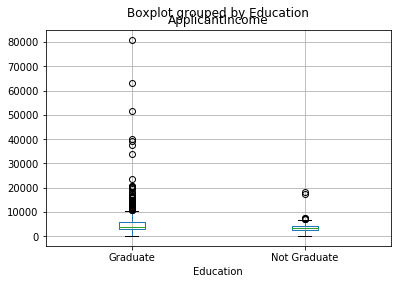

In [14]:
df.boxplot(column='ApplicantIncome',by='Education')

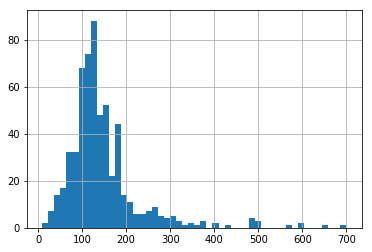

In [15]:
df['LoanAmount'].hist(bins=50)

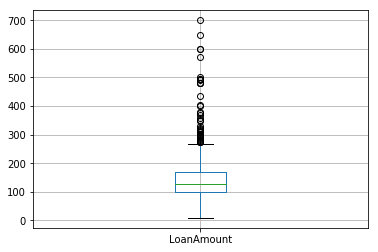

In [16]:
df.boxplot(column='LoanAmount')

In [17]:
t1=df['Credit_History'].value_counts(ascending=True)

In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
t2=df.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

In [20]:
t2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [21]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

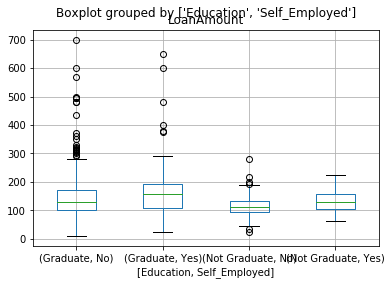

In [22]:
df.boxplot(column='LoanAmount',by=['Education','Self_Employed'])

In [23]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
df['Self_Employed'].fillna('No',inplace=True)

In [25]:
t3=df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)

In [26]:
t3

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [27]:
def fage(x):
 return t3.loc[x['Self_Employed'],x['Education']]

In [28]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)


In [29]:
df['Loanamt_log']=np.log(df['LoanAmount'])

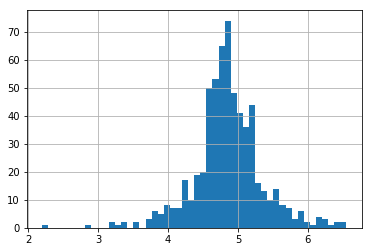

In [30]:
df['Loanamt_log'].hist(bins=50)

In [31]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loanamt_log'],
      dtype='object')

In [32]:
df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [33]:
df['total_income_log']=np.log(df['total_income'])

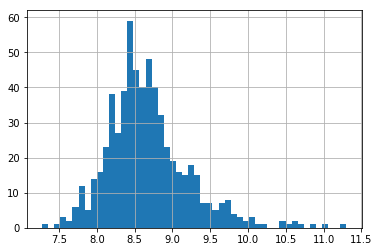

In [34]:
df['total_income_log'].hist(bins=50)

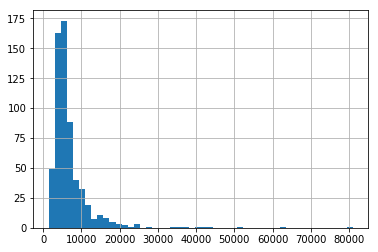

In [35]:
df['total_income'].hist(bins=50)

In [36]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [37]:
df['Gender'].isnull().sum()

0

In [38]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,total_income,total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [40]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
Loanamt_log          float64
total_income         float64
total_income_log     float64
dtype: object

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [55]:
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions=model.predict(data[predictors])
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    kf=KFold(n_splits=5)
    error=[]
    for train,test in kf.split(data):
        train_predictors = (data[predictors].iloc[train,:])
        train_target=data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors],data[outcome]) 



        

    
    


In [56]:
df.shape[0]

614

In [57]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [74]:
predictor_var = ['Credit_History','Education','total_income','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.782%
Cross-Validation Score : 80.458%


In [64]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loanamt_log', 'total_income', 'total_income_log'],
      dtype='object')

In [75]:
model=DecisionTreeClassifier()
predictor_var = ['Credit_History','Education','total_income','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 99.186%
Cross-Validation Score : 70.686%


Here we observed that although the accuracy went up on adding variables, the cross-validation error went down. This is the result of model over-fitting the data. Let’s try an even more sophisticated algorithm and see if it helps:



In [76]:
model=RandomForestClassifier()

predictor_var = ['Credit_History','Education','total_income','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)


Accuracy : 96.254%
Cross-Validation Score : 69.214%


In [79]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'Loanamt_log','total_income_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.366%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

Reducing the number of predictors
Tuning the model parameters

In [81]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loanamt_log', 'total_income', 'total_income_log'],
      dtype='object')

In [82]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)

In [83]:
featimp

Credit_History      0.269933
total_income_log    0.266306
Loanamt_log         0.228966
Dependents          0.053231
Property_Area       0.048484
Loan_Amount_Term    0.042596
Married             0.025073
Self_Employed       0.022030
Gender              0.021769
Education           0.021611
dtype: float64

In [88]:
model = RandomForestClassifier(n_estimators=25,min_samples_split=25,max_depth=7,max_features=1,)
predictor_var = ['Credit_History','Loanamt_log','total_income_log','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.410%
Cross-Validation Score : 81.110%


In [89]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
predictor_var = ['Credit_History','Loanamt_log','total_income_log','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.619%
Cross-Validation Score : 80.621%
